<a href="https://colab.research.google.com/github/Barthof/ImageMiningTeamB/blob/main/gridsearch/Model_from_scratch_Citrus_leaves_image_mining_with_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
# Install imbalance learning library
!pip install imblearn

In [ ]:
# Load dataset with info and
# split first 60% of dataset into train_ds and the other two 20% into test_ds and val_ds
(train_ds, test_ds), info = tfds.load('citrus_leaves', as_supervised=True, with_info=True, split=["train[:80%]", "train[80%:]"], shuffle_files=True, batch_size=-1)

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
# Split images and labels
image_train, label_train = tfds.as_numpy(train_ds)
image_test, label_test = tfds.as_numpy(test_ds)

In [ ]:
print(image_train.shape)
print(image_test.shape)
#print(image_val.shape)
print(label_train.shape) 
print(label_test.shape)
#print(label_val.shape)

(475, 256, 256, 3)
(119, 256, 256, 3)
(475,)
(119,)


Shape of image_train: (446, 256, 256, 3)

Shape of label_train: (446,)

Shape of image_test: (148, 256, 256, 3)

Shape of label_test: (148,)

In [ ]:
# Print matrix of image at index 0
print(image_train[0])

[[[217 202 203]
  [218 202 204]
  [220 204 205]
  ...
  [195 186 203]
  [192 186 201]
  [192 185 201]]

 [[218 203 203]
  [219 204 204]
  [220 204 205]
  ...
  [196 187 204]
  [192 185 200]
  [192 185 201]]

 [[218 204 204]
  [219 204 205]
  [220 204 205]
  ...
  [195 185 202]
  [194 186 203]
  [194 187 202]]

 ...

 [[ 76  51  25]
  [ 87  61  32]
  [ 91  62  38]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 62  39  16]
  [ 85  60  34]
  [100  72  45]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 56  35  18]
  [ 68  45  22]
  [102  76  48]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


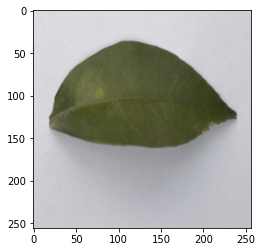

In [ ]:
# Display image
plt.imshow(image_train[1])

In [ ]:
# Extract informative features
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

print("Class names:", class_names)
print("Number of classes:", n_classes)
print("Size of training set:", len(image_train))
print("Unique labels in training set:", np.unique(label_train)) # [0: 'Black spot', 1: 'canker', 2: 'greening', 3: 'healthy']
print("Size of test set:", len(image_test))
print("Unique labels in test set:", np.unique(label_test)) # [0: 'Black spot', 1: 'canker', 2: 'greening', 3: 'healthy']

Class names: ['Black spot', 'canker', 'greening', 'healthy']
Number of classes: 4
Size of training set: 475
Unique labels in training set: [0 1 2 3]
Size of test set: 119
Unique labels in test set: [0 1 2 3]


In [ ]:
# amount per label in training set
# {0: 127, 1: 126, 2: 147, 3: 46}
print("training:", dict(sorted(Counter(label_train).items())))
# amount per label in test set
# {0: 42, 1: 37, 2: 57, 3: 12}
print("test:", dict(sorted(Counter(label_test).items())))

training: {0: 137, 1: 130, 2: 160, 3: 48}
test: {0: 32, 1: 33, 2: 44, 3: 10}


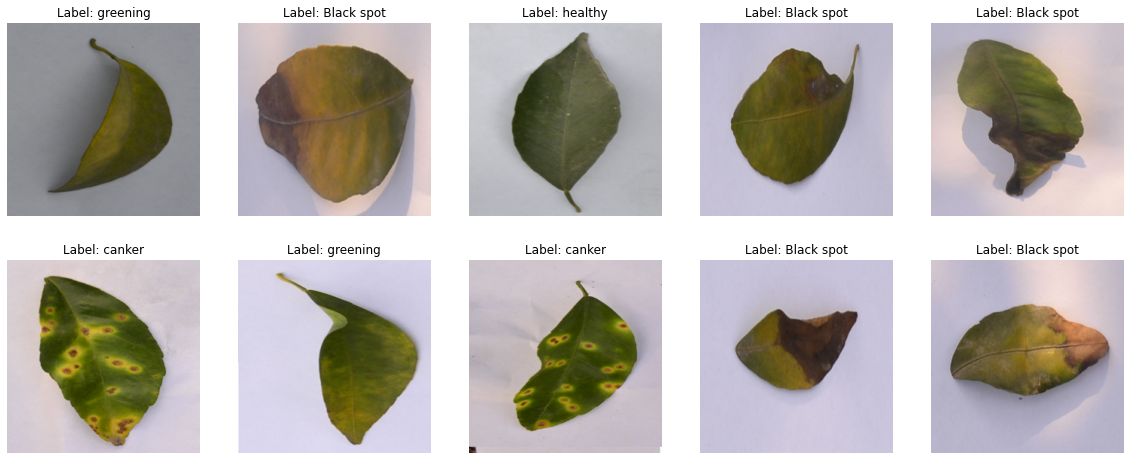

In [ ]:
import matplotlib.pyplot as plt

num_samples = 10

rand_samples = np.random.choice(np.arange(image_train.shape[0]), num_samples)

fig = plt.figure(figsize=(20, 8))
for i in range(num_samples):
    
    im = image_train[rand_samples[i]]
    label = label_train[rand_samples[i]]
    class_label = class_names[label]
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f"Label: {class_label}")
    ax.axis('off')
    ax.imshow(im)
plt.show()

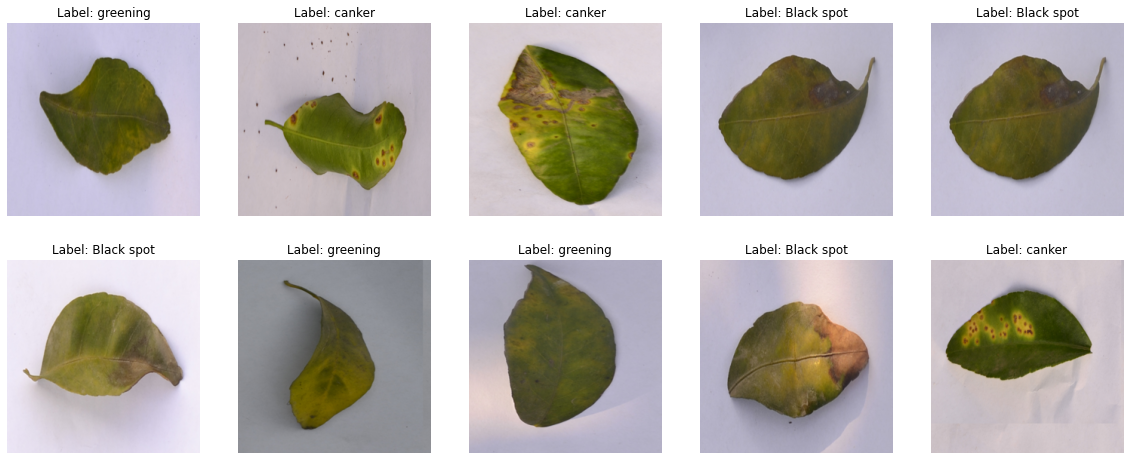

In [ ]:
num_samples = 10

rand_samples = np.random.choice(np.arange(image_test.shape[0]), num_samples)

fig = plt.figure(figsize=(20, 8))
for i in range(num_samples):
    
    im = image_test[rand_samples[i]]
    label = label_test[rand_samples[i]]
    class_label = class_names[label]
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f"Label: {class_label}")
    ax.axis('off')
    ax.imshow(im)
plt.show()

# Preprocessing

**Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator as IDG

idg_train = IDG(
    rotation_range=180,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

idg_train.fit(image_train)

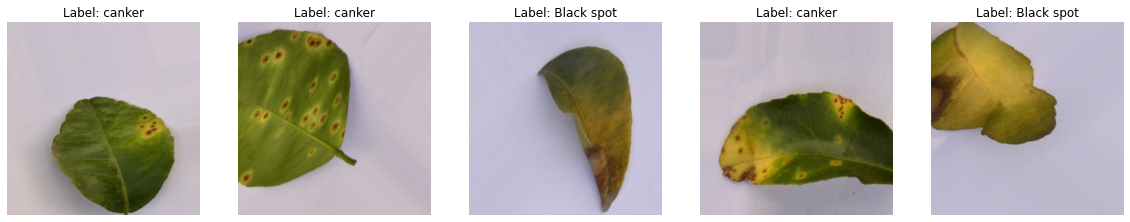

In [ ]:
fig = plt.figure(figsize=(20, 8))
for augmented_train, augmented_label in idg_train.flow(image_train, label_train, batch_size=-1):
    for i in range(0, 5):
        #plt.subplot()
        ax = fig.add_subplot(2, 5, i+1)
        label = augmented_label[i]
        class_label = class_names[label]
        ax.set_title(f"Label: {class_label}")
        ax.axis('off')
        augmented_train = augmented_train.astype('uint8')
        ax.imshow(augmented_train[i].reshape(256, 256, 3))
    break
plt.show()

In [ ]:
print(len(augmented_label))
# amount per label in augmented train set
# {0: 127, 1: 126, 2: 146, 3: 46}
print("augmented:", dict(sorted(Counter(augmented_label).items())))

474
augmented: {0: 137, 1: 129, 2: 160, 3: 48}


In [ ]:
image_train.shape, augmented_train.shape

((475, 256, 256, 3), (474, 256, 256, 3))

In [ ]:
# Append augmented data to original dataset
X_train = np.concatenate((image_train, augmented_train))
y_train = np.concatenate((label_train, augmented_label))

**Oversampling using SMOTE**

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

# Import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

0.8.1


Class=0, n=274 (28.872%)
Class=1, n=259 (27.292%)
Class=2, n=320 (33.720%)
Class=3, n=96 (10.116%)


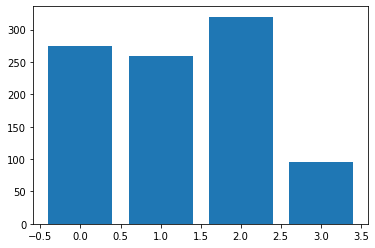

In [ ]:
# summarize distribution
counter = dict(sorted(Counter(y_train).items()))
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**Reshape X_train data first**
*   First Flatten the image
*   Apply SMOTE on this flattened image data and its labels
*   Reshape the flattened image to RGB image

In [ ]:
from imblearn.over_sampling import SMOTE
    
sm = SMOTE(random_state=42)
    
train_rows=len(X_train)
X_train = X_train.reshape(train_rows,-1)

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train = X_train.reshape(-1,256,256,3)

In [ ]:
# Print new shapes
print(X_train.shape) # (904, 256, 256, 3)
print(y_train.shape) # (904, 2)

(1280, 256, 256, 3)
(1280,)


Class=0, n=320 (25.000%)
Class=1, n=320 (25.000%)
Class=2, n=320 (25.000%)
Class=3, n=320 (25.000%)


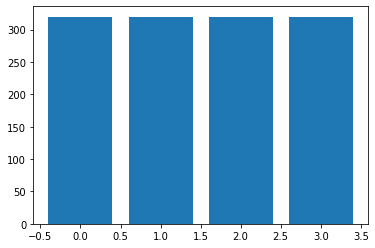

In [ ]:
# Summarize distribution after Smote
counter = dict(sorted(Counter(y_train).items()))
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**Fix the name of other val and test data sett**

In [ ]:
# Fix the name and check the shape of test images
X_test = image_test
print(X_test.shape)

(119, 256, 256, 3)


**Normalize data**

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
print(X_train[0])
print(X_test[0])

[[[0.85098039 0.79215686 0.79607843]
  [0.85490196 0.79215686 0.8       ]
  [0.8627451  0.8        0.80392157]
  ...
  [0.76470588 0.72941176 0.79607843]
  [0.75294118 0.72941176 0.78823529]
  [0.75294118 0.7254902  0.78823529]]

 [[0.85490196 0.79607843 0.79607843]
  [0.85882353 0.8        0.8       ]
  [0.8627451  0.8        0.80392157]
  ...
  [0.76862745 0.73333333 0.8       ]
  [0.75294118 0.7254902  0.78431373]
  [0.75294118 0.7254902  0.78823529]]

 [[0.85490196 0.8        0.8       ]
  [0.85882353 0.8        0.80392157]
  [0.8627451  0.8        0.80392157]
  ...
  [0.76470588 0.7254902  0.79215686]
  [0.76078431 0.72941176 0.79607843]
  [0.76078431 0.73333333 0.79215686]]

 ...

 [[0.29803922 0.2        0.09803922]
  [0.34117647 0.23921569 0.1254902 ]
  [0.35686275 0.24313725 0.14901961]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.24313725 0.15294118 0.0627451 ]
  [0.33333333 0.23529412 0.13333333]


**One Hot Encoding**

In [ ]:
# One hot encoder labels
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))

y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(label_test.reshape(-1, 1)).toarray()
print(y_train.shape)
print(y_test.shape)

(1280, 4)
(119, 4)


# Creating a Model

One requirement of the neural network model was to define the input shape, hence, all the images needed to in the same shape.

In [ ]:
X_train.shape

(1280, 256, 256, 3)

In [ ]:
input_shape = X_train[0].shape

**Define the model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers as rg
from tensorflow.keras import initializers as it

def build_model(learning_rate=1e-4):
    model = tf.keras.Sequential([
        layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape,padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(32, (3,3), activation='relu',padding='same'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu',padding='same'),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    adam=tf.keras.optimizers.Adam
    model.compile(
        optimizer=adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    return model


build_model().summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 32, 32, 64)     

**Apply early stopping to avoid overfitting**

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)


**Model Training and fitting**

Used Adam as optimizer, Categorical Cross Entropy as Loss

Hyper Parameters

    Learning Rate - 0.0001



In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn=build_model, batch_size=16)

param_grid = dict(epochs=[1], learning_rate=[1e-4, 1e-3])
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# history = model.fit(X_train,
#     y_train,
#     epochs=20,
#     shuffle = True,
#     #callbacks=callback,
# )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [ ]:
results = pd.DataFrame.from_dict(grid_result.cv_results_)

max_scores = results.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sn.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

In [ ]:
# # Accuracy plot
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

NameError: ignored

In [ ]:
# # Loss plot
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)